## Menggunakan basic NLP

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

# Dataframe
data_lite = {'Nama': ['Andi', 'Budi', 'Anton'],
             'Jawaban': ['Revolusi Industri 4.0 merupakan periode transformasi industri yang ditandai oleh integrasi teknologi digital ke dalam proses produksi.',
                         'Revolusi Industri 4.0 merupakan periode transformasi industri yang ditandai oleh integrasi teknologi digital ke dalam proses produksi.',
                         'Revolusi Industri 4.0 merupakan upaya transformasi menuju perbaikan dengan mengintegrasikan dunia online dan lini produksi di industri']}
df = pd.DataFrame(data_lite)

# tf-idf
tfidf_vectorizer = CountVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Jawaban'])
tfidf_matrix_normalized = normalize(tfidf_matrix)

# Similarity Matrix
similarity_matrix = cosine_similarity(tfidf_matrix_normalized, tfidf_matrix_normalized)

# Menampilkan hasil similarity
hasil = pd.DataFrame(similarity_matrix, columns=df['Nama'], index=df['Nama'])

# Penanda
'''
for index, row in hasil.iterrows():
    for column in hasil.columns:
        if index != column:
            if row[column] >= 0.9:
                hasil.at[index, column] = 'Mencontek'
            elif row[column] <= 0.6:
                hasil.at[index, column] = 'Original'
'''
hasil


Nama,Andi,Budi,Anton
Nama,,,
Andi,1.000000,1.000000,0.444444
Budi,1.000000,1.000000,0.444444
Anton,0.444444,0.444444,1.000000


## Version 1.1 Menggunakan Transformer

In [2]:
from sentence_transformers import SentenceTransformer, util

# Memuat model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Mendefinisikan dua kalimat
kalimat1 = "Ini adalah contoh kalimat pertama."
kalimat2 = "Ini adalah contoh kalimat kedua."

# Menghitung embeddings untuk kedua kalimat
embeddings1 = model.encode(kalimat1, convert_to_tensor=True)
embeddings2 = model.encode(kalimat2, convert_to_tensor=True)

# Menghitung kesamaan kosinus antara dua embeddings
kesamaan = util.pytorch_cos_sim(embeddings1, embeddings2)

print(f"Skor Kesamaan: {kesamaan.item()}")

Skor Kesamaan: 0.8118517994880676


In [5]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Memuat model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Dataframe
data_lite = {'Nama': ['Andi', 'Budi', 'Anton'],
             'Jawaban': ['Revolusi Industri 4.0 merupakan periode transformasi industri yang ditandai oleh integrasi teknologi digital ke dalam proses produksi.',
                         'Revolusi Industri 4.0 merupakan periode transformasi industri yang ditandai oleh integrasi teknologi digital ke dalam proses produksi.',
                         'Revolusi Industri 4.0 merupakan upaya transformasi menuju perbaikan dengan mengintegrasikan dunia online dan lini produksi di industri']}
df = pd.DataFrame(data_lite)

# Mendefinisikan kalimat
kalimat = df['Jawaban']

# Menghitung embeddings untuk kalimat
embeddings = model.encode(kalimat.tolist(), convert_to_tensor=True)

# Menghitung kesamaan kosinus antara setiap pasangan kalimat
for i in range(len(embeddings)):
    for j in range(i + 1, len(embeddings)):
        kesamaan = util.pytorch_cos_sim(embeddings[i], embeddings[j])
        print(f"Skor Kesamaan antara kalimat {i+1} dan {j+1}: {kesamaan.item()}")


Skor Kesamaan antara kalimat 1 dan 2: 1.0000001192092896
Skor Kesamaan antara kalimat 1 dan 3: 0.8827536702156067
Skor Kesamaan antara kalimat 2 dan 3: 0.8827536702156067


In [2]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util

# Memuat model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Dataframe
data_lite = {'Nama': ['Andi', 'Budi', 'Anton'],
             'Jawaban': ['Revolusi Industri 4.0 merupakan periode transformasi industri yang ditandai oleh integrasi teknologi digital ke dalam proses produksi.',
                         'Revolusi Industri 4.0 merupakan periode transformasi industri yang ditandai oleh integrasi teknologi digital ke dalam proses produksi.',
                         'Revolusi Industri 4.0 merupakan upaya transformasi menuju perbaikan dengan mengintegrasikan dunia online dan lini produksi di industri']}
df = pd.DataFrame(data_lite)
kalimat = df['Jawaban']

# Calculate embeddings
embeddings = model.encode(kalimat.tolist(), convert_to_tensor=True)

# Iniciate matriks similarity
num_sentences = len(kalimat)
similarity_matrix = np.zeros((num_sentences, num_sentences))

# Fill matriks similarity
for i in range(num_sentences):
    for j in range(i + 1, num_sentences):
        similarity_matrix[i][j] = util.pytorch_cos_sim(embeddings[i], embeddings[j])

# Fill matriks...
for i in range(num_sentences):
    for j in range(0, i):
        similarity_matrix[i][j] = similarity_matrix[j][i]

similarity_df = pd.DataFrame(similarity_matrix, columns=df['Nama'], index=df['Nama'])
similarity_df

Nama,Andi,Budi,Anton
Nama,,,
Andi,0.000000,1.000000,0.882754
Budi,1.000000,0.000000,0.882754
Anton,0.882754,0.882754,0.000000


<AxesSubplot: xlabel='Nama', ylabel='Nama'>

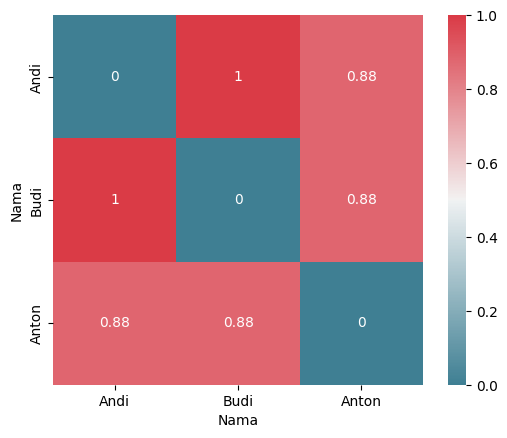

In [6]:
import seaborn as sns
sns.heatmap(similarity_df, mask=np.zeros_like(similarity_df),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True)

## Version 1.12 Menggunakan Transformer Versi 2

In [ ]:
data_lite = {'Nama': ['Andi', 'Budi', 'Anton'],
             'Jawaban': ['Revolusi Industri 4.0 merupakan periode transformasi industri yang ditandai oleh integrasi teknologi digital ke dalam proses produksi.',
                         'Revolusi Industri 4.0 merupakan periode transformasi industri yang ditandai oleh integrasi teknologi digital ke dalam proses produksi.',
                         'Revolusi Industri 4.0 merupakan upaya transformasi menuju perbaikan dengan mengintegrasikan dunia online dan lini produksi di industri']}
df = pd.DataFrame(data_lite)
kalimat = df['Jawaban']

## Version 1.2 Penyesuaian workflow

In [ ]:
def process_document(text):
  """
  Create a vector for given text and adjust it for cosine similarity search
  """
  text_vect = create_vector_from_text(tokenizer, model, text)
  text_vect = np.array(text_vect)
  text_vect = text_vect.reshape(1, -1)
  return text_vect

def is_plagiarism(similarity_score, plagiarism_threshold):
  is_plagiarism = False
  if(similarity_score >= plagiarism_threshold):
      is_plagiarism = True
  return is_plagiarism

def check_incoming_document(incoming_document):
  text_lang = detect(incoming_document)
  language_list = ['de', 'fr', 'el', 'ja', 'ru']
  final_result = ""
  if(text_lang == 'en'):
    final_result = incoming_document
  elif(text_lang not in language_list):
    final_result = None
  else:
    # Translate in English
    final_result = translate_text(incoming_document, text_lang)
  return final_result
 
def run_plagiarism_analysis(query_text, data, plagiarism_threshold=0.8):
  top_N=3
  # Check the language of the query/incoming text and translate if required.
  document_translation = check_incoming_document(query_text)
  if(document_translation is None):
    print("Only the following languages are supported: English, French, Russian, German, Greek and Japanese")
    exit(-1)
  else:
    # Preprocess the document to get the required vector for similarity analysis
    query_vect = process_document(document_translation)

    # Run similarity Search
    data["similarity"] = data["vectors"].apply(lambda x:
                                            cosine_similarity(query_vect, x))
    data["similarity"] = data["similarity"].apply(lambda x: x[0][0])
    similar_articles = data.sort_values(by='similarity',
                                        ascending=False)[1:top_N+1]
    formated_result = similar_articles[["abstract", "paper_id",
                                        "similarity"]].reset_index(drop = True)
    similarity_score = formated_result.iloc[0]["similarity"]
    most_similar_article = formated_result.iloc[0]["abstract"]
    is_plagiarism_bool = is_plagiarism(similarity_score, plagiarism_threshold)
    plagiarism_decision = {'similarity_score': similarity_score,
                          'is_plagiarism': is_plagiarism_bool,
                          'most_similar_article': most_similar_article,
                          'article_submitted': query_text
                          }
    return plagiarism_decision

In [11]:
import pandas as pd
 
def preprocess_data(data_path, sample_size):
  data = pd.read_csv(data_path, low_memory=False)
  data = data.dropna(subset = ['abstract']).reset_index(drop = True)
  data = data.sample(sample_size)[['abstract']]
  return data
 
# Read data & preprocess it
data_path = "metadata.csv"
a = preprocess_data(data_path, 5)
a

,abstract
629414,"The incidence of cardiovascular diseases and cardiovascular burden (the number of deaths) are continuously rising worldwide. Heart disease leads to heart failure (HF) in affected patients. Therefore any additional aid to current medical support systems is crucial for the clinician to forecast the survival status for these patients. The collaborative use of machine learning and IoT devices has become very important in today’s intelligent healthcare systems. This paper presents a Public Key Infrastructure (PKI) secured IoT enabled framework entitled Cardiac Diagnostic Feature and Demographic Identification (CDF-DI) systems with significant Models that recognize several Cardiac disease features related to HF. To achieve this goal, we used statistical and machine learning techniques to analyze the Cardiac secondary dataset. The Elevated Serum Creatinine (SC) levels and Serum Sodium (SS) could cause renal problems and are well established in HF patients. The Mann Whitney U test found that SC and SS levels affected the survival status of patients (p < 0.05). Anemia, diabetes, and BP features had no significant impact on the SS and SC level in the patient (p > 0.05). The Cox regression model also found a significant association of age group with the survival status using follow-up months. Furthermore, the present study also proposed important features of Cardiac disease that identified the patient’s survival status, age group, and gender. The most prominent algorithm was the Random Forest (RF) suggesting five key features to determine the survival status of the patient with an accuracy of 96%: Follow-up months, SC, Ejection Fraction (EF), Creatinine Phosphokinase (CPK), and platelets. Additionally, the RF selected five prominent features (smoking habits, CPK, platelets, follow-up month, and SC) in recognition of gender with an accuracy of 94%. Moreover, the five vital features such as CPK, SC, follow-up month, platelets, and EF were found to be significant predictors for the patient’s age group with an accuracy of 96%. The Kaplan Meier plot revealed that mortality was high in the extremely old age group ([Formula: see text] (1) = 8.565). The recommended features have possible effects on clinical practice and would be supportive aid to the existing medical support system to identify the possibility of the survival status of the heart patient. The doctor should primarily concentrate on the follow-up month, SC, EF, CPK, and platelet count for the patient’s survival in the situation."
123157,"BACKGROUND Sub-Saharan Africa (SSA) experiences disproportionate burden of cervical cancer incidence and mortality due in part to low uptake of cervical screening, a strategy for prevention and down-staging of cervical cancer. This scoping review identifies studies of interventions to increase uptake of cervical screening among women in the region and uses the Integrated Behavioral Model (IBM) to describe how interventions might work. METHODS A systematic search of literature was conducted in PubMed, Web of Science, Embase, and CINAHL databases through May 2019. Screening and data charting were performed by two independent reviewers. Intervention studies measuring changes to uptake in screening among women in SSA were included, with no restriction to intervention type, study setting or date, or participant characteristics. Intervention type and implementation strategies were described using behavioral constructs from the IBM. RESULTS Of the 3704 citations the search produced, 19 studies were selected for inclusion. Most studies were published between 2014 and 2019 (78.9%) and were set in Nigeria (47.4%) and South Africa (26.3%). Studies most often assessed screening with Pap smears (31.6%) and measured uptake as ever screened (42.1%) or screened during the study period (36.8%). Education-based interventions were most common (57.9%) and the IBM construct of knowledge/skills to perform screening was targeted most frequently (68.4%). 

In [13]:
# Tambahkan data baru
french_article_to_check = """Les Réseaux d'Innovation et de Transfert Agricole (RITA) ont été créés en 2011 pour mieux connecter la recherche et le développement agricole, intra et inter-DOM, avec un objectif d'accompagnement de la diversification des productions locales. Le CGAAER a été chargé d'analyser ce dispositif et de proposer des pistes d'action pour améliorer la chaine Recherche – Formation – Innovation – Développement – Transfert dans les outre-mer dans un contexte d'agriculture durable, au profit de l'accroissement de l'autonomie alimentaire."""

new_data = {
    'Nama': ['Unknown'],
    'Jawaban': [french_article_to_check]
}

a = a.append(pd.DataFrame(new_data), ignore_index=True)
a


C:\Users\M S I\AppData\Local\Temp\ipykernel_16072\1515843945.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(pd.DataFrame(new_data), ignore_index=True)


,abstract,Nama,Jawaban
0,"The incidence of cardiovascular diseases and cardiovascular burden (the number of deaths) are continuously rising worldwide. Heart disease leads to heart failure (HF) in affected patients. Therefore any additional aid to current medical support systems is crucial for the clinician to forecast the survival status for these patients. The collaborative use of machine learning and IoT devices has become very important in today’s intelligent healthcare systems. This paper presents a Public Key Infrastructure (PKI) secured IoT enabled framework entitled Cardiac Diagnostic Feature and Demographic Identification (CDF-DI) systems with significant Models that recognize several Cardiac disease features related to HF. To achieve this goal, we used statistical and machine learning techniques to analyze the Cardiac secondary dataset. The Elevated Serum Creatinine (SC) levels and Serum Sodium (SS) could cause renal problems and are well established in HF patients. The Mann Whitney U test found that SC and SS levels affected the survival status of patients (p < 0.05). Anemia, diabetes, and BP features had no significant impact on the SS and SC level in the patient (p > 0.05). The Cox regression model also found a significant association of age group with the survival status using follow-up months. Furthermore, the present study also proposed important features of Cardiac disease that identified the patient’s survival status, age group, and gender. The most prominent algorithm was the Random Forest (RF) suggesting five key features to determine the survival status of the patient with an accuracy of 96%: Follow-up months, SC, Ejection Fraction (EF), Creatinine Phosphokinase (CPK), and platelets. Additionally, the RF selected five prominent features (smoking habits, CPK, platelets, follow-up month, and SC) in recognition of gender with an accuracy of 94%. Moreover, the five vital features such as CPK, SC, follow-up month, platelets, and EF were found to be significant predictors for the patient’s age group with an accuracy of 96%. The Kaplan Meier plot revealed that mortality was high in the extremely old age group ([Formula: see text] (1) = 8.565). The recommended features have possible effects on clinical practice and would be supportive aid to the existing medical support system to identify the possibility of the survival status of the heart patient. The doctor should primarily concentrate on the follow-up month, SC, EF, CPK, and platelet count for the patient’s survival in the situation.",NaN,NaN
1,"BACKGROUND Sub-Saharan Africa (SSA) experiences disproportionate burden of cervical cancer incidence and mortality due in part to low uptake of cervical screening, a strategy for prevention and down-staging of cervical cancer. This scoping review identifies studies of interventions to increase uptake of cervical screening among women in the region and uses the Integrated Behavioral Model (IBM) to describe how interventions might work. METHODS A systematic search of literature was conducted in PubMed, Web of Science, Embase, and CINAHL databases through May 2019. Screening and data charting were performed by two independent reviewers. Intervention studies measuring changes to uptake in screening among women in SSA were included, with no restriction to intervention type, study setting or date, or participant characteristics. Intervention type and implementation strategies were described using behavioral constructs from the IBM. RESULTS Of the 3704 citations the search produced, 19 studies were selected for inclusion. Most studies were published between 2014 and 2019 (78.9%) and were set in Nigeria (47.4%) and South Africa (26.3%). Studies most often assessed screening with Pap smears (31.6%) and measured uptake as ever screened (42.1%) or screened during the study period (36.8%). Education-based interventions were most common (57.9%) and the IBM construct of knowledge/skills to perform screening was targeted most frequentl

In [ ]:
# Mendefinisikan kalimat
a = df['abstract']

# Menghitung embeddings untuk kalimat
embeddings = model.encode(kalimat.tolist(), convert_to_tensor=True)

# Menghitung kesamaan kosinus antara setiap pasangan kalimat
for i in range(len(embeddings)):
    for j in range(i + 1, len(embeddings)):
        kesamaan = util.pytorch_cos_sim(embeddings[i], embeddings[j])
        print(f"Skor Kesamaan antara kalimat {i+1} dan {j+1}: {kesamaan.item()}")

## Version 1.3 Final

In [5]:
import os
import warnings
from pathlib import Path

from PyPDF2 import PdfReader

def extract_text_from_pdf(pdf_path):
    documents = []
    folder_prefix = "Pdf/"

    for file in os.listdir(folder_prefix):
        if file.endswith(".pdf"):
            try:
                pdf_path = folder_prefix + file
                pdf_reader = PdfReader(pdf_path)
                num_pages = len(pdf_reader.pages)
                for page in range(num_pages):
                    page_content = pdf_reader.pages[page].extract_text()
                    documents.append(page_content)
            except:
                warnings.warn(f"Error reading {pdf_path}")
                continue

    if not documents:
        raise ValueError("No valid PDF documents found.")
    
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=0)
    context = "\n\n".join(str(page_content) for page_content in documents)
    texts = text_splitter.split_text(context)

    embeddings = OpenAIEmbeddings()

    vector_index = Chroma.from_texts(texts, embeddings).as_retriever()

    return vector_index

print(extract_text_from_pdf)

<function extract_text_from_pdf at 0x000001F939FE5300>
